# Support Vector Regression (SVR)

**Importing libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

**Step 1: Generate synthetic data**

In [ ]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Adding noise

**Step 2: Split the data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 3: Data Preprocessing**

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

**Step 4: Create and fit the SVR model**

In [ ]:
svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

SVR(C=100)

**Step 5: Make predictions**

In [ ]:
X_test_scaled = scaler_X.transform(X_test)
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

**Step 6: Calculate Mean Absolute Error and R² Score**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Absolute Error (MAE): 0.0806
R² Score: 0.9826


**Step 7: Visualization**

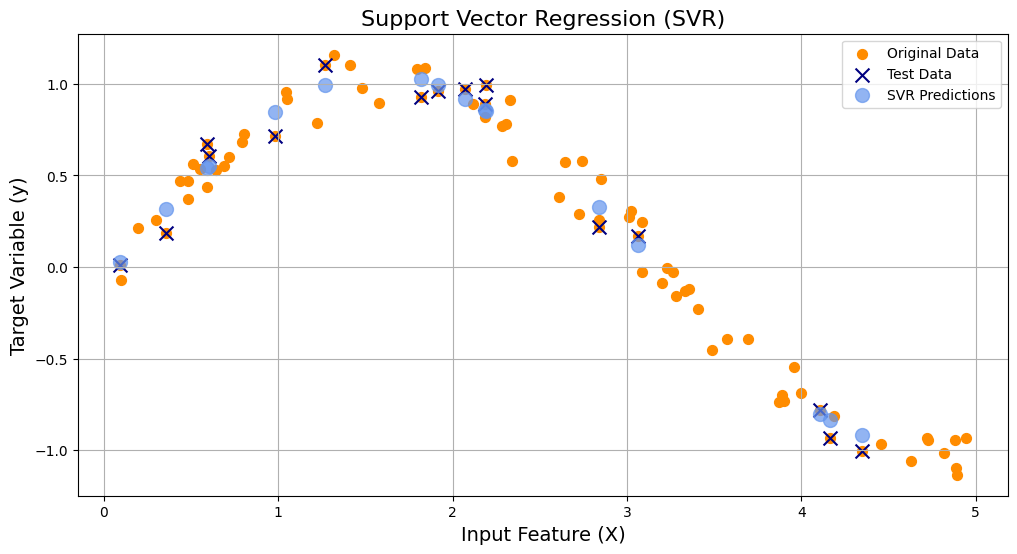

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data
plt.scatter(X, y, color='darkorange', label='Original Data', s=50)

# Scatter plot of the test data
plt.scatter(X_test, y_test, color='navy', label='Test Data', s=100, marker='x')

# Scatter plot of the predictions
plt.scatter(X_test, y_pred, color='cornflowerblue', label='SVR Predictions', s=100, alpha=0.7)

# Adding labels and title
plt.xlabel('Input Feature (X)', fontsize=14)
plt.ylabel('Target Variable (y)', fontsize=14)
plt.title('Support Vector Regression (SVR)', fontsize=16)
plt.legend()
plt.grid()
plt.show()

**Step 8: Visualization of Predicted vs Actual Values**


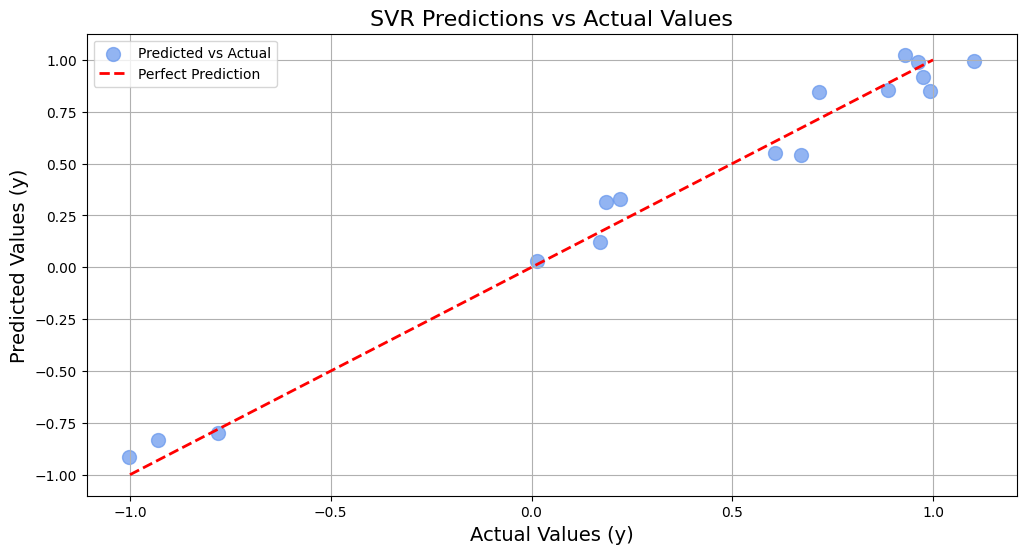

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='cornflowerblue', label='Predicted vs Actual', s=100, alpha=0.7)
plt.plot([-1, 1], [-1, 1], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values (y)', fontsize=14)
plt.ylabel('Predicted Values (y)', fontsize=14)
plt.title('SVR Predictions vs Actual Values', fontsize=16)
plt.legend()
plt.grid()
plt.show()

# **Example: Predicting Electricity Consumption**

Here I'll simulate a dataset that includes features such as:

        Temperature (in °C)
        Humidity (in %)
        Day of the Week (0 for Sunday to 6 for Saturday)
        Hour of the Day [link text](https://)(0 to 24)

I'll generate synthetic data that reflects typical electricity usage patterns and build a Support Vector Regression model to predict electricity consumption.                              

Mean Absolute Error (MAE): 17.29 kWh
R² Score: 0.9472


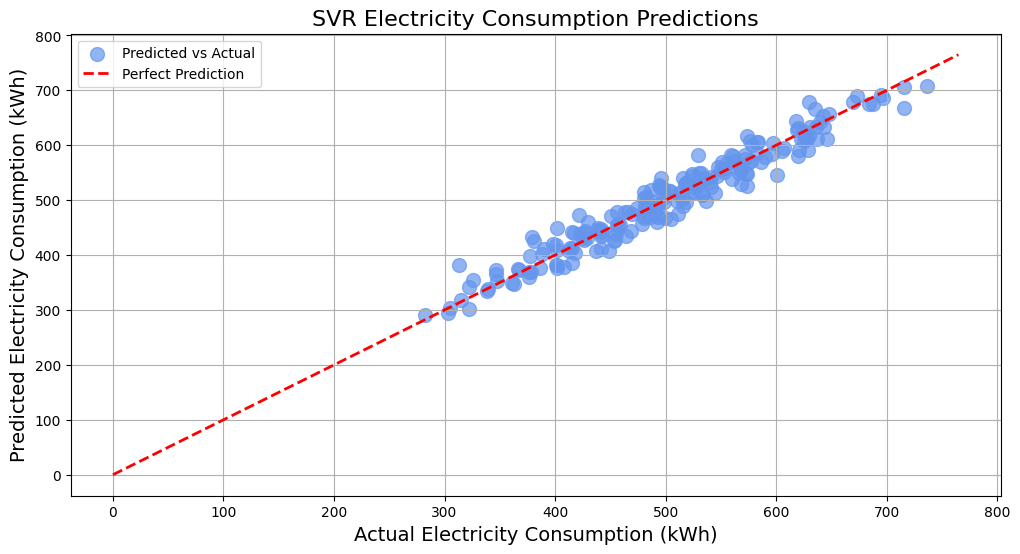

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Generate synthetic electricity consumption data
np.random.seed(42)
num_samples = 1000

# Simulating features
temperature = np.random.uniform(15, 40, size=num_samples)  # Temperature between 15 and 40 degrees Celsius
humidity = np.random.uniform(20, 100, size=num_samples)     # Humidity between 20% and 100%
day_of_week = np.random.randint(0, 7, size=num_samples)     # Day of the week
hour_of_day = np.random.randint(0, 24, size=num_samples)    # Hour of the day

# Simulating electricity consumption (in kWh)
# Electricity consumption can depend on temperature, humidity, day of the week, and hour of the day
electricity_consumption = (
    100 + 10 * temperature + 2 * humidity - 5 * day_of_week + 3 * hour_of_day + np.random.normal(0, 20, num_samples)
)

# Create a DataFrame
data = pd.DataFrame({
   'Temperature': temperature,
   'Humidity': humidity,
   'Day of Week': day_of_week,
   'Hour of Day': hour_of_day,
   'Electricity Consumption': electricity_consumption
})

# Step 2: Prepare data for regression
X = data[['Temperature', 'Humidity', 'Day of Week', 'Hour of Day']].values
y = data['Electricity Consumption'].values

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Data Preprocessing
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Step 5: Create and fit the SVR model
svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

# Step 6: Make predictions
X_test_scaled = scaler_X.transform(X_test)
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Step 7: Calculate Mean Absolute Error and R² Score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f} kWh')
print(f'R² Score: {r2:.4f}')

# Step 8: Visualization
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='cornflowerblue', label='Predicted vs Actual', s=100, alpha=0.7)
plt.plot([0, max(y)], [0, max(y)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Electricity Consumption (kWh)', fontsize=14)
plt.ylabel('Predicted Electricity Consumption (kWh)', fontsize=14)
plt.title('SVR Electricity Consumption Predictions', fontsize=16)
plt.legend()
plt.grid()
plt.show()


